**2. Giảm chiều dữ liệu**

In [1]:
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

PCA – Principal Component Analysis

In [20]:
# Giảm chiều dữ liệu với PCA

df_processed = pd.read_csv("../data/processed/data_processed.csv")

y = df_processed['Class/ASD']
X = df_processed.drop('Class/ASD', axis=1)
pca = PCA()
X_pca = pca.fit_transform(X)

print(X_pca.shape)
print(X_pca[0])

(800, 20)
[-3.99500036e+02  6.73445101e-02  7.99859961e-01 -3.78426098e-01
 -9.79931729e-01 -6.21310575e-01 -2.16092289e-01 -6.33604405e-01
  1.53495837e-01  4.68296783e-01 -1.55603553e-02  5.85049915e-01
  3.92729908e-01 -1.89444808e-01  8.62333377e-02 -3.58749608e-01
 -9.75669278e-03 -1.73743602e-01 -1.79065085e-01  1.30884038e-02]


In [8]:
# Tỷ lệ phương sai giải thích
explained_var = pca.explained_variance_ratio_
cum_explained_var = np.cumsum(explained_var)

print("Explained variance per component:", explained_var[:10])
print("Cumulative explained variance:", cum_explained_var[:10])

Explained variance per component: [9.99904751e-01 3.31550080e-05 2.07712893e-05 8.22002822e-06
 4.28785500e-06 3.94707781e-06 3.19546694e-06 2.88200261e-06
 2.83947162e-06 2.46177837e-06]
Cumulative explained variance: [0.99990475 0.99993791 0.99995868 0.9999669  0.99997119 0.99997513
 0.99997833 0.99998121 0.99998405 0.99998651]


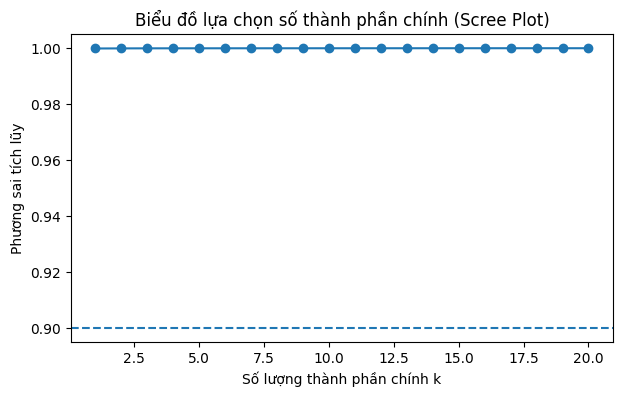

In [37]:
plt.figure(figsize=(7,4))
plt.plot(range(1, len(cum_explained_var)+1), cum_explained_var, marker='o')
plt.axhline(0.9, linestyle='--')
plt.xlabel("Số lượng thành phần chính k")
plt.ylabel("Phương sai tích lũy")
plt.title("Biểu đồ lựa chọn số thành phần chính (Scree Plot)")
plt.show()

PC1 chiếm 99.99% phương sai → nghĩa là gần như toàn bộ thông tin quan trọng của dữ liệu nằm trong PC1. Vì các biến A1_Score đến A10_Score đều cùng thang đo, cùng mang thông tin hành vi / đánh giá → có tương quan mạnh với nhau → PCA sẽ tổng hợp chúng thành một trục chính duy nhất.

Các thành phần còn lại chỉ giải thích dưới 0.01% phương sai. Nghĩa là chúng không mang thêm thông tin mới đáng kể.

Hiển thị trực quan dữ liệu theo từng cặp thành phần chính (PC1–PC6)

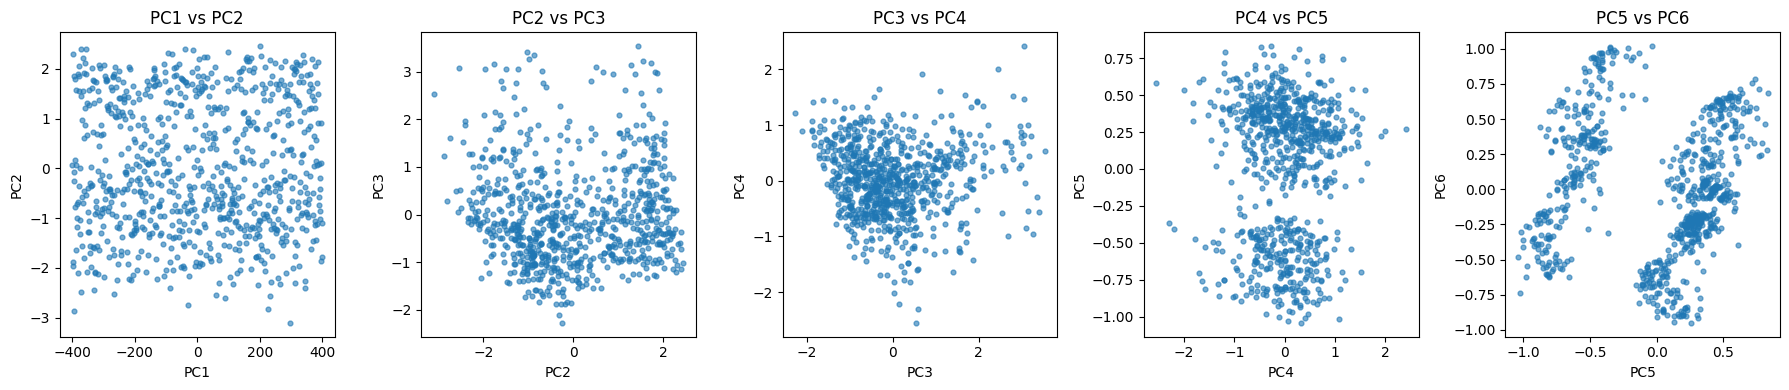

In [ ]:


pairs = [(0,1), (1,2), (2,3), (3,4), (4,5)]
fig, axes = plt.subplots(1, len(pairs), figsize=(18,4))

for ax, (i, j) in zip(axes, pairs):
    ax.scatter(X_pca[:, i], X_pca[:, j], s=12, alpha=0.6)
    ax.set_xlabel(f"PC{i+1}")
    ax.set_ylabel(f"PC{j+1}")
    ax.set_title(f"PC{i+1} vs PC{j+1}")

plt.tight_layout()
plt.show()


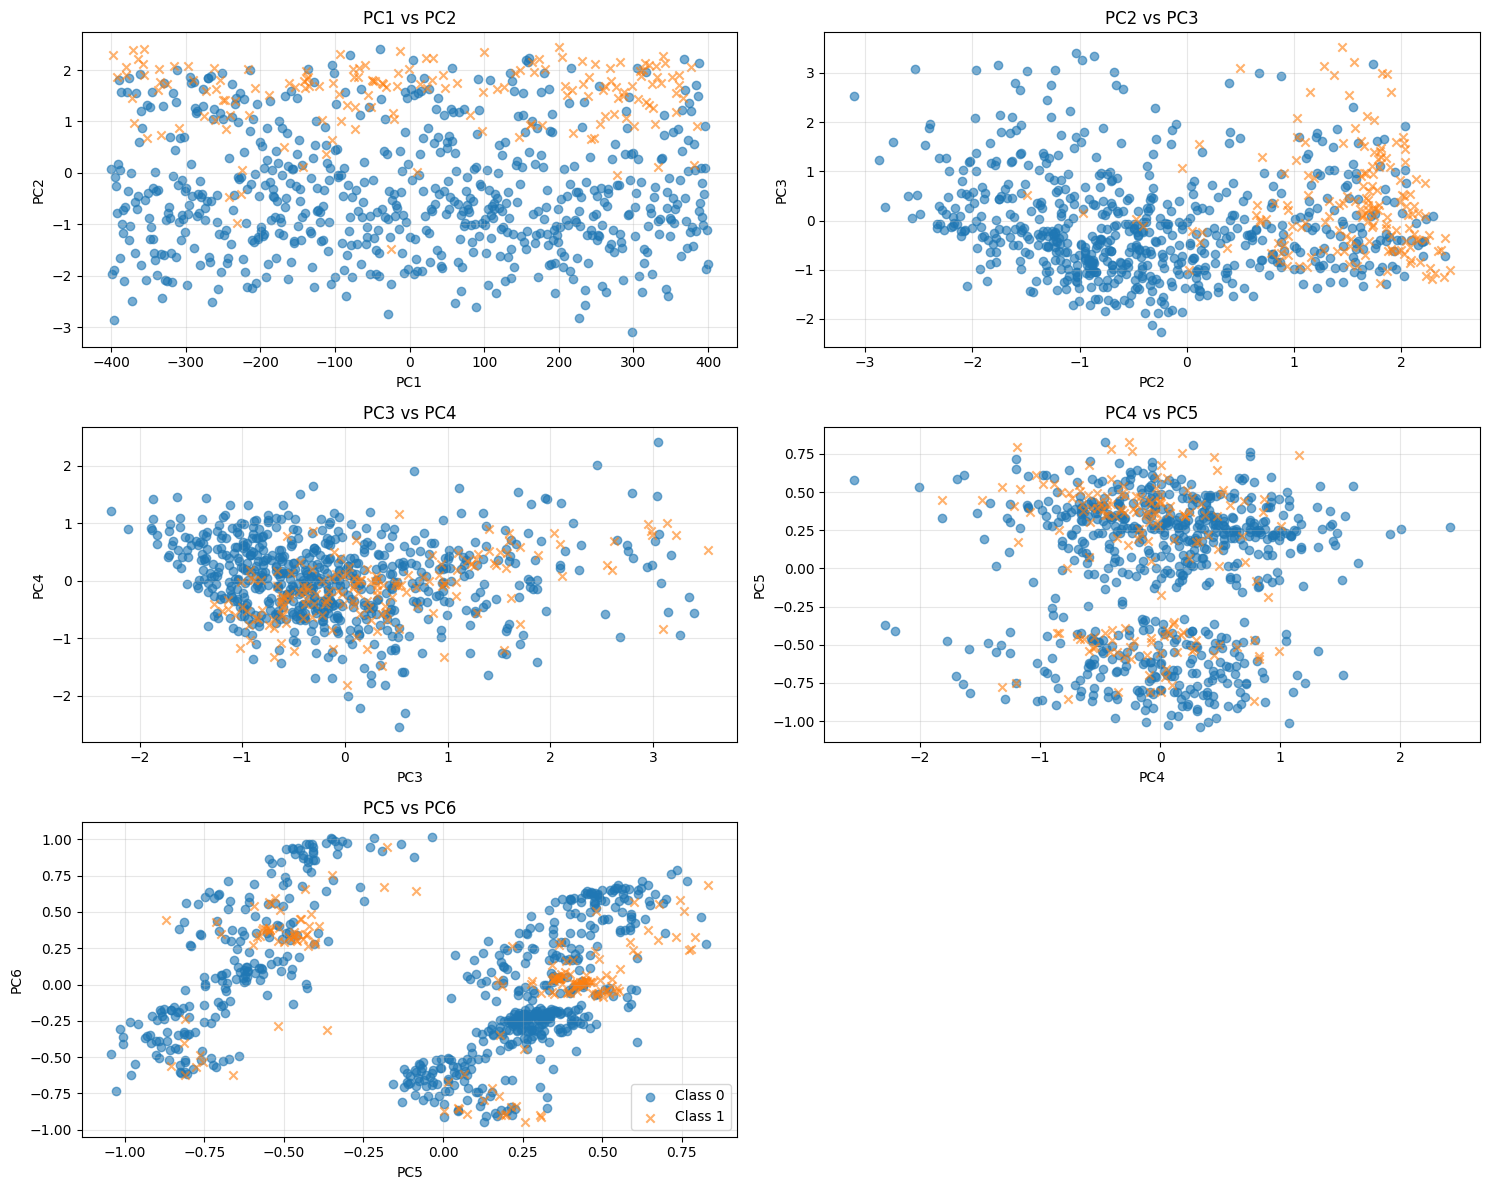

In [ ]:

plt.figure(figsize=(15, 12))

for idx, (i, j) in enumerate(pairs, 1):
    PC_i = X_pca[:, i]
    PC_j = X_pca[:, j]

    plt.subplot(3, 2, idx)
    plt.scatter(PC_i[y == 0], PC_j[y == 0], alpha=0.6, label="Class 0", marker='o')
    plt.scatter(PC_i[y == 1], PC_j[y == 1], alpha=0.6, label="Class 1", marker='x')

    plt.xlabel(f"PC{i+1}")
    plt.ylabel(f"PC{j+1}")
    plt.title(f"PC{i+1} vs PC{j+1}")
    plt.grid(alpha=0.3)

# Chỉ hiển thị legend một lần ở cuối
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()



LDA – Linear Discriminant Analysis

In [31]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_lda = lda.fit_transform(X, y)

print("Shape after LDA:", X_lda.shape)

Shape after LDA: (800, 1)


In [34]:
print("Mean of LDA component:", X_lda.mean())
print("Std of LDA component:", X_lda.std())

print("Explained variance (phương sai giải thích):", lda.explained_variance_ratio_)

Mean of LDA component: 1.1324274851176596e-15
Std of LDA component: 1.3424588003963693
Explained variance (phương sai giải thích): [1.]


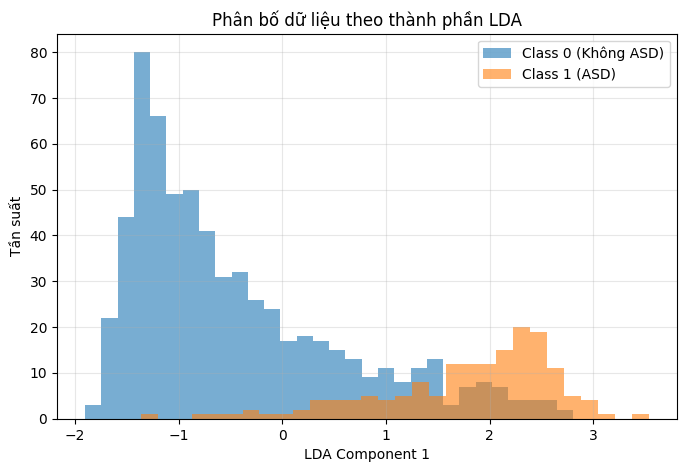

In [35]:
plt.figure(figsize=(8,5))
plt.hist(X_lda[y==0], bins=30, alpha=0.6, label="Class 0 (Không ASD)")
plt.hist(X_lda[y==1], bins=30, alpha=0.6, label="Class 1 (ASD)")
plt.xlabel("LDA Component 1")
plt.ylabel("Tần suất")
plt.title("Phân bố dữ liệu theo thành phần LDA")
plt.legend()
plt.grid(alpha=0.3)
plt.show()

Vì số lớp (Class/ASD) = 2 lớp => LDA chỉ tạo được tối đa 1 thành phần phân biệt (discriminant component)

Với phân lớp nhị phân, LDA chỉ cho ra 1 chiều, không thể 2D. Nên dùng PCA trên phần dư phương sai để thêm 1 trục phụ → tổng thành 2D

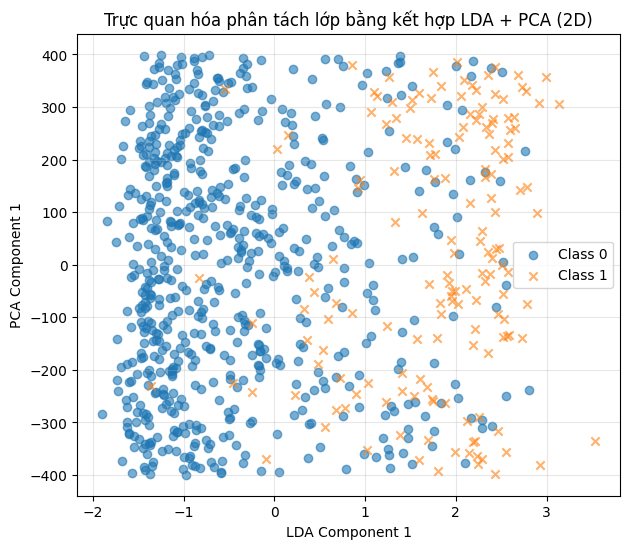

In [33]:
pca = PCA(n_components=1)
X_pca_1d = pca.fit_transform(X)

# Gộp thành 2 chiều
X_lda_2d = np.column_stack((X_lda, X_pca_1d))

# Vẽ scatter
plt.figure(figsize=(7,6))
plt.scatter(X_lda_2d[y==0,0], X_lda_2d[y==0,1], label="Class 0", alpha=0.6, marker='o')
plt.scatter(X_lda_2d[y==1,0], X_lda_2d[y==1,1], label="Class 1", alpha=0.6, marker='x')
plt.xlabel("LDA Component 1")
plt.ylabel("PCA Component 1")
plt.title("Trực quan hóa phân tách lớp bằng kết hợp LDA + PCA (2D)")
plt.legend()
plt.grid(alpha=0.3)
plt.show()